In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Importing and preparing the data

In [3]:
# Read the data from CSV file
newData = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
newData = newData.drop_duplicates()
# Set the frequency to hourly
newData = newData.asfreq('H')
# Fill missing values using forward fill method
newData = newData.fillna(method='ffill')

#### Visualizing the data

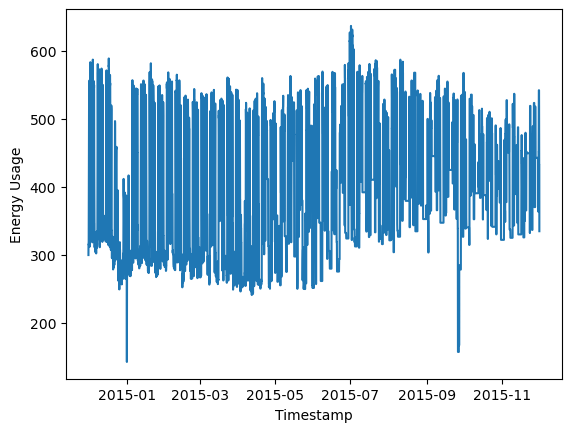

In [4]:
plt.plot(newData)
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.show()

#### Scaling or Normalizing the Data
Before training the ARIMA model, it is often a good practice to scale or normalize the data to a similar range. One common method is to use Min-Max scaling, which scales the values between 0 and 1.

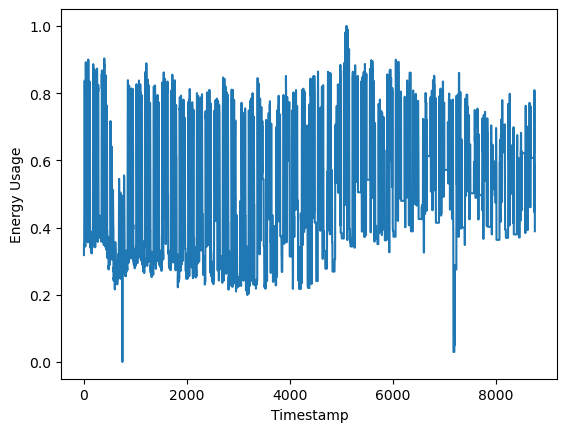

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the data
scaled_data = scaler.fit_transform(newData)

plt.plot(scaled_data)
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.show()

#### Splitting the data for training and testing

In [269]:
# Define the split date
split_date = '2015-09-30'

# Convert scaled_data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, index=newData.index, columns=['Office_Garman'])

# Split the data into training and testing sets
train = scaled_df.loc[:split_date]
test = scaled_df.loc[split_date:]


#### Plotting the ACF and PACF

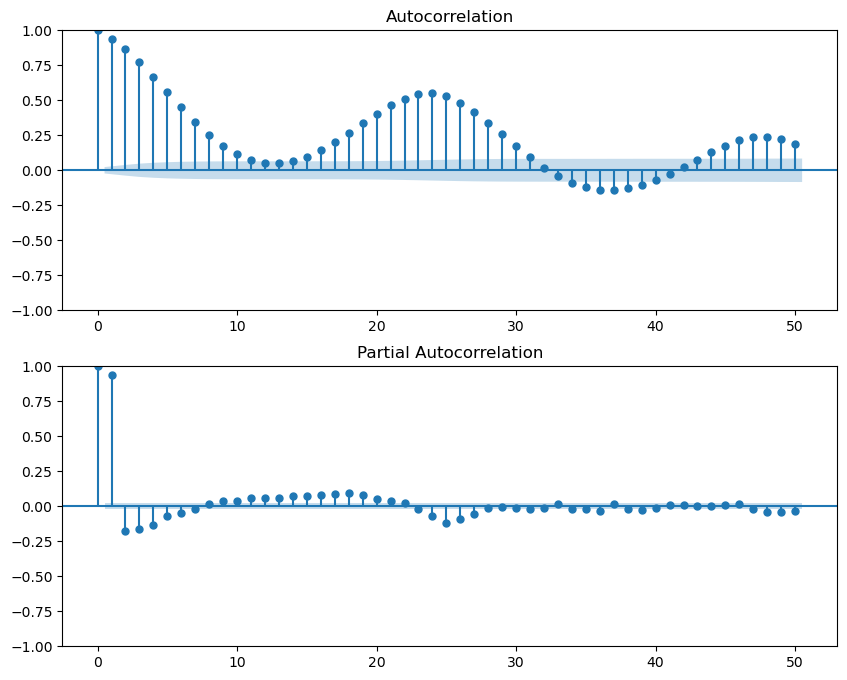

In [270]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data, ax=ax1, lags=50)
plot_pacf(train_data, ax=ax2, lags=50)
plt.show()

#### Fitting the ARIMA model

In [271]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model parameters
order = (24, 0, 0)  # (p, d, q)

# Initialize the ARIMA model
model = ARIMA(train, order=order)

# Fit the model to the training data
model_fit = model.fit()


#### Predicting on the test set

In [272]:
# Reshape the predictions array
predictions = predictions.reshape(-1, 1)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Create a new DataFrame with the predicted values
predictions_df = pd.DataFrame(predictions, index=test.index, columns=['Predictions'])


#### Plotting the predictions and actual data

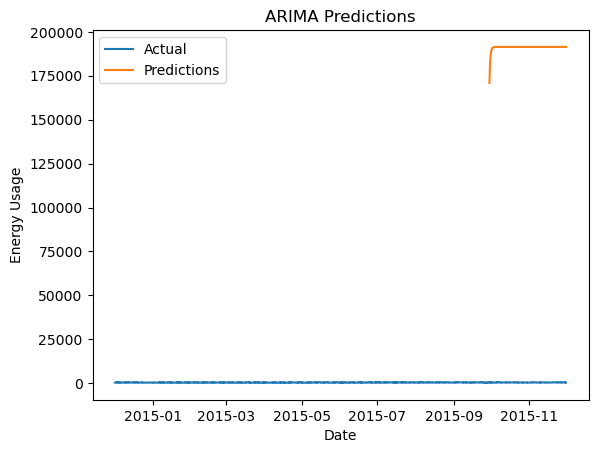

In [273]:
import matplotlib.pyplot as plt

# Plot the actual data
plt.plot(newData.index, newData['Office_Garman'], label='Actual')

# Plot the predictions
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('ARIMA Predictions')
plt.legend()

# Display the plot
plt.show()
